In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from src.problem import get_model,  random_instance

: 

# ONTS fixed parameters

In [102]:
q = 5

soc_inicial = 0.7
limite_inferior = 0.0
bat_usage = 5

ef = 0.9
k = 1
beta = 10
v_bat = 3.6

subs = 1

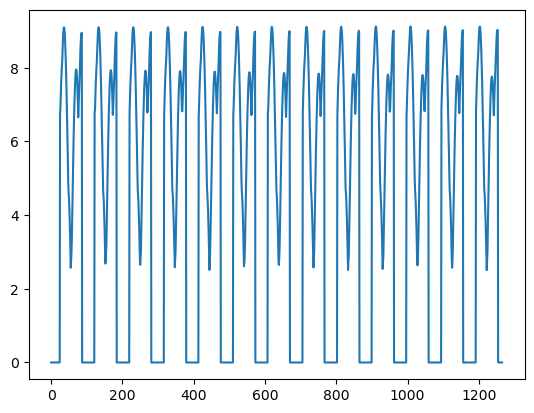

In [103]:
orbit_power = np.loadtxt('../data/raw/resource.csv')
plt.plot(orbit_power)
plt.show()

# Random parameters

In [104]:
# INPUT
T = 97
jobs = 13

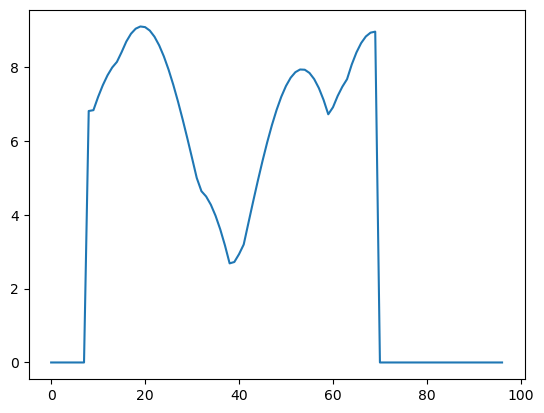

In [105]:
orbit_start = np.random.randint(0, 600)
power_resource = orbit_power[orbit_start:orbit_start+T]
plt.plot(power_resource)
plt.show()

In [106]:
min_power = 0.01
max_power = 4.00

power_use = np.random.rand(jobs)
power_use = (max_power - min_power) * power_use + min_power
power_use

array([2.09425228, 1.03500664, 1.67439817, 2.32289514, 0.05978242,
       1.29172697, 1.56489751, 0.70830999, 1.72881187, 3.20652655,
       2.22574499, 3.75193805, 0.46916695])

In [107]:
priority = np.arange(jobs) + 1
np.random.shuffle(priority)
priority

array([10,  7,  5,  9, 13,  6,  8,  3, 11,  1,  4, 12,  2])

In [108]:
min_startup = np.random.randint(1, T / 10, size=jobs)

max_startup = np.random.rand(jobs)
max_startup = max_startup * (0.8 * T - min_startup) + min_startup
max_startup = max_startup.astype(int)

min_startup, max_startup

(array([2, 6, 1, 5, 8, 8, 5, 8, 8, 5, 3, 2, 6]),
 array([19, 27, 73, 59, 65, 12, 20, 51, 28, 58, 68, 10, 49]))

In [109]:
min_cpu_time = np.random.randint(1, T / 5, size=jobs)

max_cpu_time = np.random.rand(jobs)
max_cpu_time = max_cpu_time * (0.5 * T - min_cpu_time) + min_cpu_time
max_cpu_time = max_cpu_time.astype(int)

min_cpu_time, max_cpu_time

(array([18,  5, 11,  4,  4,  4,  3,  4, 11,  1,  7, 16, 13]),
 array([18, 45, 44, 10, 26, 33, 19, 17, 32, 41, 15, 34, 16]))

In [110]:
min_job_period = np.random.rand(jobs)
min_job_period = min_job_period * (0.5 * T - min_cpu_time) + min_cpu_time
min_job_period = min_job_period.astype(int)

max_job_period = np.random.rand(jobs)
max_job_period = max_job_period * (T - min_job_period) + min_job_period
max_job_period = max_job_period.astype(int)

min_job_period, max_job_period

(array([20, 39, 14, 34,  4, 29, 23, 26, 10,  2, 39, 24,  5]),
 array([32, 41, 68, 52, 60, 73, 70, 39, 76, 87, 85, 40, 18]))

In [172]:
win = np.eye(jobs)[0].astype(int)
np.random.shuffle(win)
win_min = win * np.random.randint(1, T * 1/5)
win_max = win * np.random.randint(T * 4/5, T)
win_max[win_max == 0] = T

win_min, win_max

(array([4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([82, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97]))

In [171]:
win_max

array([97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 81, 97])

In [112]:
instance = {
    "subs": subs,
    "jobs": jobs,
    "T": T,

    "power_use": power_use,
    "power_resource": power_resource,

    "min_cpu_time": min_cpu_time,
    "max_cpu_time": max_cpu_time,
    "min_job_period": min_job_period,
    "max_job_period": max_job_period,
    "min_startup": min_startup,
    "max_startup": max_startup,
    "priority": priority,
    "win_min": win_min,
    "win_max": win_max,
}

model = get_model(instance, new_ineq=True)
model.optimize()
model.SolCount

0

# Feasibility

In [20]:
for _ in range(100):
    instance = random_instance(291, 22)

    model = get_model(instance, timeout=10)

    model.optimize()
    if model.SolCount > 0:
        break
model.SolCount

2

: 

In [18]:
instance = random_instance(291, 22)

model = get_model(instance, timeout=10)

# model.optimize()

model.computeIIS()
# model.IISConstr

GurobiError: Cannot compute IIS on a feasible model

In [10]:
instance['min_startup'][13]

18

In [13]:
instance['min_job_period'][13]

33

In [17]:
instance['min_cpu_time'][13]

46

In [16]:
instance['T'] / instance['min_cpu_time'][13]

6.326086956521739

In [9]:
[c for c, i in zip(model.getConstrs(), model.IISConstr) if i > 0]

[<gurobi.Constr C6_j13>,
 <gurobi.Constr C10_j13_t0>,
 <gurobi.Constr C10_j13_t33>,
 <gurobi.Constr C10_j13_t65>,
 <gurobi.Constr C10_j13_t98>,
 <gurobi.Constr C10_j13_t128>,
 <gurobi.Constr C10_j13_t158>,
 <gurobi.Constr C10_j13_t190>,
 <gurobi.Constr C10_j13_t226>,
 <gurobi.Constr C10_j13_t258>]